# Transfer Learning
`model: vgg-16`

`database: Cifar10`

**`cutting_layer = pool4`**

---
## Data summary
```
data1 ---> initial_learning_rate = 1e-1

data2 ---> initial_learning_rate = 1e-3

data3 ---> initial_learning_rate = 1e-5

data4 ---> initial_learning_rate = 1e-3 | keep = 0.5

data5 ---> initial_learning_rate = 1e-3 | data_augmentation = False

data6 ---> initial_learning_rate = 1e-3 | bottleneck = False

data7 ---> initial_learning_rate = 1e-3 | fine_tunning = True
```

---

**`cutting_layer = pool3`**

```
data8 ---> initial_learning_rate = 1e-3
```

**`cutting_layer = pool53`**

```
data9 ---> initial_learning_rate = 1e-3
```

---

In [1]:
from transferlearning_v2 import Hyperparameters, Extract, train
from params_analysis import save_params, load_df
import matplotlib.pyplot as plt
import time

%matplotlib inline  

In [2]:
LOGDIR = 'results/exe_1/'
CPP = './tensorboard/cifar10_vgg16/exe_1/'

JSON_FILE = 'exe_1.json'
CUT_LAYER = 'pool4'

df = load_df(LOGDIR+JSON_FILE)

In [3]:
extrc = Extract()
extrc.return_metrics = True
extrc.return_losses = True

---
## Learning_rate conclusion:

**data1:** `learning_rate:1e-1` $\to$ `acc:10.02` 

**data2:** `learning_rate:1e-3` $\to$ `acc:76.52` 

**data3:** `learning_rate:1e-5` $\to$ `acc:63.51` 

**Note:** Once the `data2` has reached higher accuracy values, the other tests will be performed with `learning_rate:1e-3`

---

Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 10.23% - Batch_loss: 2.3056 - (156.16, 19988.44) (steps,images)/sec
--> Validation accuracy: 10.70% (535/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 10.23% - Batch_loss: 2.3270 - (328.67, 42069.99) (steps,images)/sec
--> Validation accuracy: 9.74% (487/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 10.23% - Batch_loss: 2.3091 - (333.25, 42655.45) (steps,images)/sec
--> Validation accuracy: 9.82% (491/5000)

********************************************

--> Global step: 37979 - Last batch acc: 11.36% - Batch_loss: 2.2920 - (328.46, 42043.41) (steps,images)/sec
--> Validation accuracy: 10.00% (500/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 9.09% - Batch_loss: 2.3178 - (327.01, 41856.87) (steps,images)/sec
--> Validation accuracy: 10.00% (500/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 10.23% - Batch_loss: 2.3083 - (331.93, 42487.17) (steps,images)/sec
--> Validation accuracy: 9.44% (472/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 15.91% - Batch_loss: 2.2968 - (325.01, 41600.99) (steps,images)/sec
--> Validation accuracy: 9.80% (490/5000)

*************************************************************
Epoch 40/100
--> Global step: 42199 - Last batch acc: 11.36% - Batch_loss: 2.3100 - (331.09, 42379.43) (

--> Global step: 77014 - Last batch acc: 10.23% - Batch_loss: 2.3074 - (325.85, 41708.47) (steps,images)/sec
--> Validation accuracy: 9.46% (473/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 9.09% - Batch_loss: 2.3063 - (318.06, 40711.67) (steps,images)/sec
--> Validation accuracy: 9.42% (471/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 5.68% - Batch_loss: 2.3116 - (326.57, 41800.43) (steps,images)/sec
--> Validation accuracy: 9.42% (471/5000)

*************************************************************
Epoch 76/100
--> Global step: 80179 - Last batch acc: 7.95% - Batch_loss: 2.3026 - (328.06, 41992.13) (steps,images)/sec
--> Validation accuracy: 10.20% (510/5000)

*************************************************************
Epoch 77/100
--> Global step: 81234 - Last batch acc: 19.32% - Batch_loss: 2.2901 - (327.04, 41860.61) (ste

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


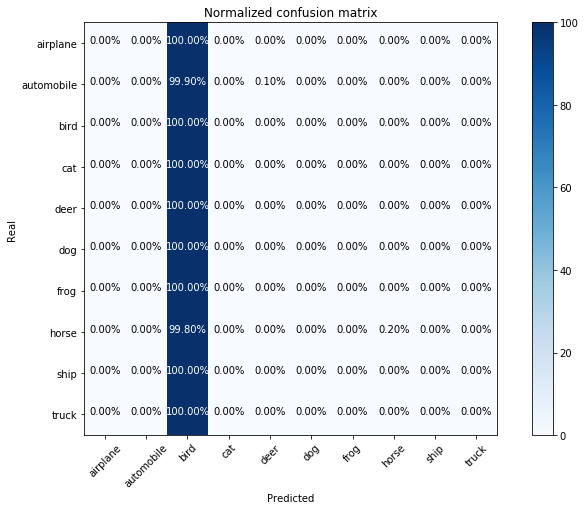

In [4]:
if __name__ == "__main__":
  name = 'data1'
  
  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-1
  params.cut_layer = CUT_LAYER
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

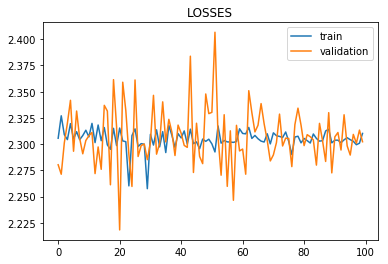

In [5]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [6]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1
accuracy,10.02
batch_size,128
bottleneck,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1
cm,NaN
cut_layer,pool4
data_augmentation,True
decay_rate,0.98
decay_steps,1000
elapsed_time,352.145


Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 68.18% - Batch_loss: 16130.2715 - (160.58, 20553.94) (steps,images)/sec
--> Validation accuracy: 68.42% (3421/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 61.36% - Batch_loss: 26607.4375 - (332.90, 42610.66) (steps,images)/sec
--> Validation accuracy: 70.70% (3535/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 73.86% - Batch_loss: 10947.8457 - (324.26, 41505.41) (steps,images)/sec
--> Validation accuracy: 71.94% (3597/5000)

***************************

--> Global step: 36924 - Last batch acc: 95.45% - Batch_loss: 130.1291 - (320.13, 40976.48) (steps,images)/sec
--> Validation accuracy: 76.66% (3833/5000)

*************************************************************
Epoch 36/100
--> Global step: 37979 - Last batch acc: 97.73% - Batch_loss: 55.9533 - (341.45, 43705.43) (steps,images)/sec
--> Validation accuracy: 76.68% (3834/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (337.85, 43244.98) (steps,images)/sec
--> Validation accuracy: 76.06% (3803/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 97.73% - Batch_loss: 17.3519 - (323.61, 41422.23) (steps,images)/sec
--> Validation accuracy: 76.40% (3820/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 97.73% - Batch_loss: 73.2000 - (336.83

--> Global step: 74904 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (337.55, 43206.66) (steps,images)/sec
--> Validation accuracy: 77.00% (3850/5000)

*************************************************************
Epoch 72/100
--> Global step: 75959 - Last batch acc: 98.86% - Batch_loss: 22.6649 - (334.36, 42797.44) (steps,images)/sec
--> Validation accuracy: 77.08% (3854/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (339.86, 43502.45) (steps,images)/sec
--> Validation accuracy: 77.18% (3859/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 98.86% - Batch_loss: 56.5598 - (336.92, 43125.88) (steps,images)/sec
--> Validation accuracy: 77.24% (3862/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (322.62,

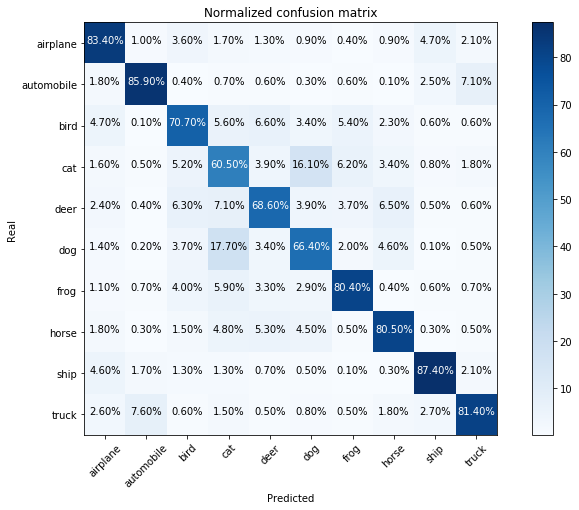

In [7]:
  name = 'data2'

  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

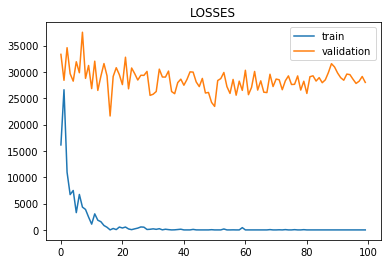

In [8]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [9]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2
accuracy,10.02,76.52
batch_size,128,128
bottleneck,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2
cm,NaN,NaN
cut_layer,pool4,pool4
data_augmentation,True,True
decay_rate,0.98,0.98
decay_steps,1000,1000
elapsed_time,352.145,345.421


Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 14.77% - Batch_loss: 134750.4844 - (158.21, 20251.42) (steps,images)/sec
--> Validation accuracy: 16.88% (844/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 19.32% - Batch_loss: 124029.4531 - (324.98, 41597.83) (steps,images)/sec
--> Validation accuracy: 24.74% (1237/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 26.14% - Batch_loss: 89641.4531 - (324.64, 41554.50) (steps,images)/sec
--> Validation accuracy: 31.80% (1590/5000)

**************************

--> Global step: 36924 - Last batch acc: 61.36% - Batch_loss: 30470.4141 - (321.29, 41125.15) (steps,images)/sec
--> Validation accuracy: 59.12% (2956/5000)

*************************************************************
Epoch 36/100
--> Global step: 37979 - Last batch acc: 55.68% - Batch_loss: 32014.3105 - (328.24, 42014.71) (steps,images)/sec
--> Validation accuracy: 59.16% (2958/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 69.32% - Batch_loss: 20653.9043 - (329.05, 42118.04) (steps,images)/sec
--> Validation accuracy: 59.32% (2966/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 59.09% - Batch_loss: 34302.8242 - (323.57, 41416.35) (steps,images)/sec
--> Validation accuracy: 59.46% (2973/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 71.59% - Batch_loss: 22670.

--> Global step: 74904 - Last batch acc: 63.64% - Batch_loss: 29298.9551 - (321.70, 41177.92) (steps,images)/sec
--> Validation accuracy: 61.80% (3090/5000)

*************************************************************
Epoch 72/100
--> Global step: 75959 - Last batch acc: 68.18% - Batch_loss: 20714.1426 - (318.64, 40786.43) (steps,images)/sec
--> Validation accuracy: 61.90% (3095/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 60.23% - Batch_loss: 28229.2383 - (320.08, 40970.42) (steps,images)/sec
--> Validation accuracy: 61.96% (3098/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 68.18% - Batch_loss: 15558.3223 - (326.74, 41822.45) (steps,images)/sec
--> Validation accuracy: 62.00% (3100/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 57.95% - Batch_loss: 27202.

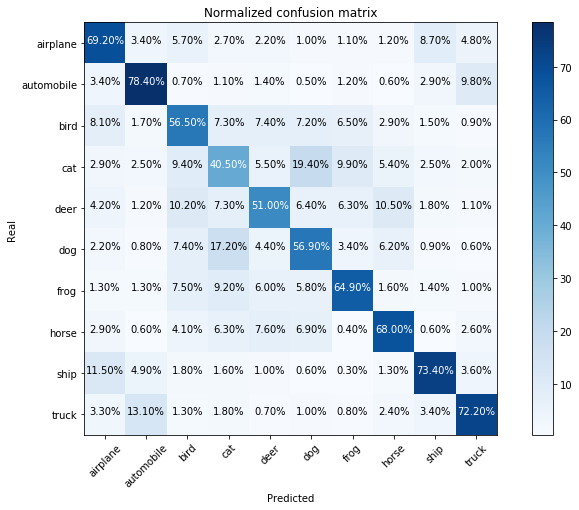

In [10]:
  name = 'data3'
  
  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-5
  params.cut_layer = CUT_LAYER
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

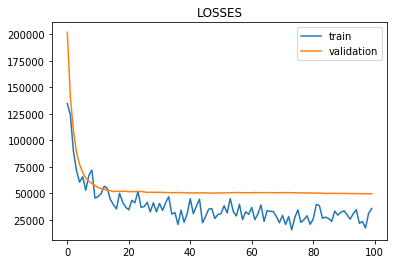

In [11]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [12]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3
accuracy,10.02,76.52,63.1
batch_size,128,128,128
bottleneck,True,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3
cm,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4
data_augmentation,True,True,True
decay_rate,0.98,0.98,0.98
decay_steps,1000,1000,1000
elapsed_time,352.145,345.421,360.319


---
## Dropout conclusion:

**data2:** `learning_rate:1e-3`, `drop:1.0` $\to$ `acc:76.52` 

**data4:** `learning_rate:1e-3`, `drop:0.5` $\to$ `acc:10.45` 

**Note:** `dropput` made the results worse.

---

Augmenting data...
Stopping gradient
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 44.32% - Batch_loss: 13956.0664 - (156.21, 19994.45) (steps,images)/sec
--> Validation accuracy: 46.44% (2322/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 17.05% - Batch_loss: 2646.3625 - (327.62, 41935.18) (steps,images)/sec
--> Validation accuracy: 28.18% (1409/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 14.77% - Batch_loss: 375.0384 - (329.99, 42239.22) (steps,images)/sec
--> Validation accuracy: 16.72% (836/5000)

*****************************************************

--> Global step: 37979 - Last batch acc: 12.50% - Batch_loss: 2.2767 - (329.89, 42225.47) (steps,images)/sec
--> Validation accuracy: 9.98% (499/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 11.36% - Batch_loss: 2.3020 - (327.15, 41875.72) (steps,images)/sec
--> Validation accuracy: 9.86% (493/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 9.09% - Batch_loss: 2.3027 - (330.28, 42275.22) (steps,images)/sec
--> Validation accuracy: 9.92% (496/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 11.36% - Batch_loss: 2.2769 - (329.42, 42166.09) (steps,images)/sec
--> Validation accuracy: 9.90% (495/5000)

*************************************************************
Epoch 40/100
--> Global step: 42199 - Last batch acc: 7.95% - Batch_loss: 2.3019 - (329.77, 42211.19) (ste

--> Global step: 77014 - Last batch acc: 10.23% - Batch_loss: 2.2765 - (324.15, 41491.80) (steps,images)/sec
--> Validation accuracy: 9.92% (496/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 10.23% - Batch_loss: 2.3020 - (327.56, 41927.90) (steps,images)/sec
--> Validation accuracy: 9.92% (496/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 11.36% - Batch_loss: 2.3016 - (334.38, 42800.70) (steps,images)/sec
--> Validation accuracy: 9.92% (496/5000)

*************************************************************
Epoch 76/100
--> Global step: 80179 - Last batch acc: 7.95% - Batch_loss: 2.3026 - (327.10, 41868.36) (steps,images)/sec
--> Validation accuracy: 9.98% (499/5000)

*************************************************************
Epoch 77/100
--> Global step: 81234 - Last batch acc: 13.64% - Batch_loss: 2.3029 - (331.52, 42434.83) (st

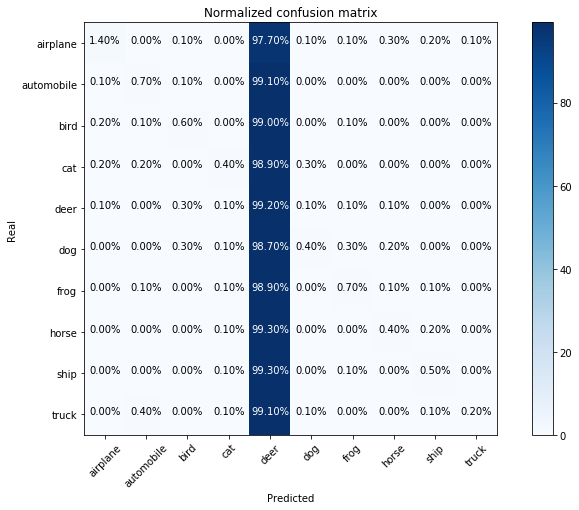

In [13]:
  name = 'data4'
  
  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.keep = 0.5
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

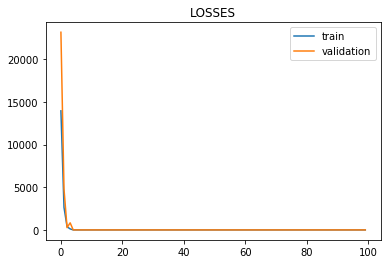

In [14]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [15]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4
accuracy,10.02,76.52,63.1,10.45
batch_size,128,128,128,128
bottleneck,True,True,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4
cm,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4
data_augmentation,True,True,True,True
decay_rate,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547


---
## Data augmentation conclusion:

**data2:** `learning_rate:1e-3`, `data_augmentation:True` $\to$ `acc:76.52` , `elapsed_time:345.421`

**data5:** `learning_rate:1e-3`, `data_augmentation:False` $\to$ `acc:75.44`, `elapsed_time:136.241` 

**Note:** `data_augmentation:True` has not offered much increase in accuracy and took almost 2.5x more time that `data_augmentation:False`

---

Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool4_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:   351 - Last batch acc: 55.47% - Batch_loss: 51645.9531 - (77.92, 9974.10) (steps,images)/sec
--> Validation accuracy: 61.04% (3052/5000)

*************************************************************
Epoch 2/100
--> Global step:   703 - Last batch acc: 74.22% - Batch_loss: 25721.6602 - (316.56, 40519.26) (steps,images)/sec
--> Validation accuracy: 65.66% (3283/5000)

*************************************************************
Epoch 3/100
--> Global step:  1055 - Last batch acc: 75.00% - Batch_loss: 14190.4199 - (321.00, 41088.62) (steps,images)/sec
--> Validation accuracy: 66.70% (3335/5000)

************************************************

--> Global step: 12319 - Last batch acc: 92.97% - Batch_loss: 849.2178 - (316.69, 40536.06) (steps,images)/sec
--> Validation accuracy: 74.22% (3711/5000)

*************************************************************
Epoch 36/100
--> Global step: 12671 - Last batch acc: 89.06% - Batch_loss: 1461.7080 - (323.86, 41454.10) (steps,images)/sec
--> Validation accuracy: 74.28% (3714/5000)

*************************************************************
Epoch 37/100
--> Global step: 13023 - Last batch acc: 94.53% - Batch_loss: 830.9220 - (316.17, 40469.14) (steps,images)/sec
--> Validation accuracy: 74.80% (3740/5000)

*************************************************************
Epoch 38/100
--> Global step: 13375 - Last batch acc: 93.75% - Batch_loss: 339.3143 - (320.81, 41064.17) (steps,images)/sec
--> Validation accuracy: 74.60% (3730/5000)

*************************************************************
Epoch 39/100
--> Global step: 13727 - Last batch acc: 90.62% - Batch_loss: 1369.0215 - (

--> Global step: 24991 - Last batch acc: 99.22% - Batch_loss: 41.4362 - (324.11, 41486.55) (steps,images)/sec
--> Validation accuracy: 75.84% (3792/5000)

*************************************************************
Epoch 72/100
--> Global step: 25343 - Last batch acc: 97.66% - Batch_loss: 94.8264 - (318.88, 40816.49) (steps,images)/sec
--> Validation accuracy: 75.62% (3781/5000)

*************************************************************
Epoch 73/100
--> Global step: 25695 - Last batch acc: 97.66% - Batch_loss: 223.5062 - (315.53, 40387.42) (steps,images)/sec
--> Validation accuracy: 75.08% (3754/5000)

*************************************************************
Epoch 74/100
--> Global step: 26047 - Last batch acc: 96.88% - Batch_loss: 367.5497 - (322.89, 41329.59) (steps,images)/sec
--> Validation accuracy: 75.44% (3772/5000)

*************************************************************
Epoch 75/100
--> Global step: 26399 - Last batch acc: 97.66% - Batch_loss: 159.4028 - (319.

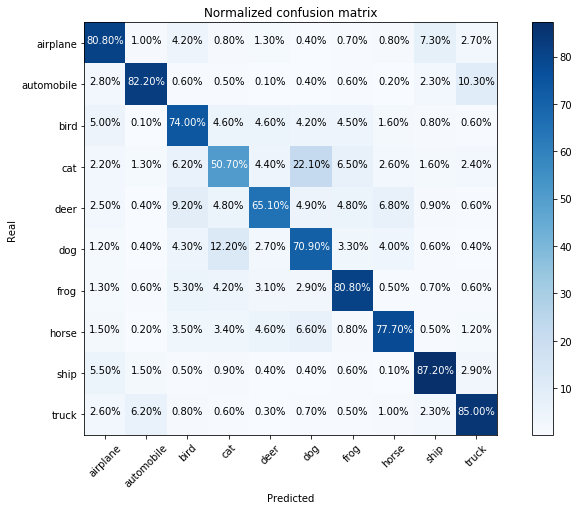

In [16]:
  name = 'data5'

  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.data_augmentation = False
  params.check_points_path = CPP+name  
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

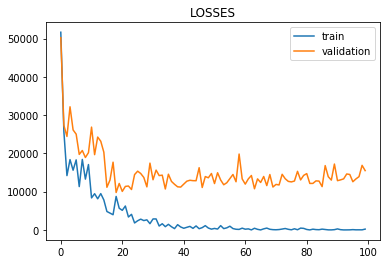

In [17]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [18]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4,data5
accuracy,10.02,76.52,63.1,10.45,75.44
batch_size,128,128,128,128,128
bottleneck,True,True,True,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4,./tensorboard/cifar10_vgg16/exe_1/data5
cm,NaN,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4,pool4
data_augmentation,True,True,True,True,False
decay_rate,0.98,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547,136.241


---
## Bottleneck conclusion:

**data2:** `learning_rate:1e-3`, `bottleneck:True` $\to$ `acc:76.52` , `elapsed_time:345.421`

**data6:** `learning_rate:1e-3`, `bottleneck:False` $\to$ `acc:76.96`, `elapsed_time:3913.53` 

**Note:** `bottleneck:False` has not offered much increase in accuracy and took almost 12x more time that `bottleneck:True`

---

Augmenting data...
Stopping gradient
Dropout was disabled.

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 57.95% - Batch_loss: 29259.4629 - (22.45, 2873.18) (steps,images)/sec
--> Validation accuracy: 67.12% (3356/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 72.73% - Batch_loss: 14909.8066 - (28.21, 3610.92) (steps,images)/sec
--> Validation accuracy: 70.38% (3519/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 64.77% - Batch_loss: 12198.7500 - (28.12, 3598.97) (steps,images)/sec
--> Validation accuracy: 71.08% (3554/5000)

*************************************************************
Epoch 4/100
--> Global step:  4219 - Last batch acc: 75.00% - Batch_loss: 7003.0190 - (28.02, 3586.09) (steps,images)/sec
--> Validation accuracy: 71.16% (3558/5000)

*********************

--> Validation accuracy: 75.80% (3790/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 98.86% - Batch_loss: 82.1264 - (28.14, 3602.14) (steps,images)/sec
--> Validation accuracy: 76.22% (3811/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 98.86% - Batch_loss: 53.9545 - (28.03, 3587.79) (steps,images)/sec
--> Validation accuracy: 76.30% (3815/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.11, 3598.21) (steps,images)/sec
--> Validation accuracy: 76.40% (3820/5000)

*************************************************************
Epoch 40/100
--> Global step: 42199 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.16, 3604.20) (steps,images)/sec
--> Validation accuracy: 76.16% (3808/5000)

*******************************************

--> Validation accuracy: 77.08% (3854/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 98.86% - Batch_loss: 115.0001 - (28.11, 3598.04) (steps,images)/sec
--> Validation accuracy: 77.22% (3861/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.12, 3598.84) (steps,images)/sec
--> Validation accuracy: 77.14% (3857/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.01, 3585.50) (steps,images)/sec
--> Validation accuracy: 77.18% (3859/5000)

*************************************************************
Epoch 76/100
--> Global step: 80179 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.11, 3598.30) (steps,images)/sec
--> Validation accuracy: 77.16% (3858/5000)

******************************************

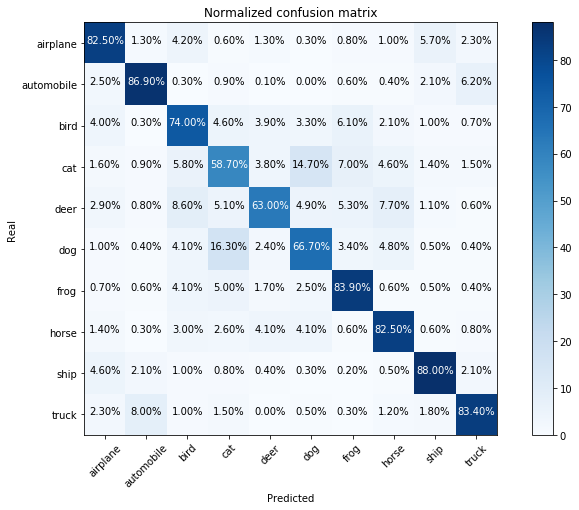

In [19]:
  name = 'data6'

  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.bottleneck = False
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

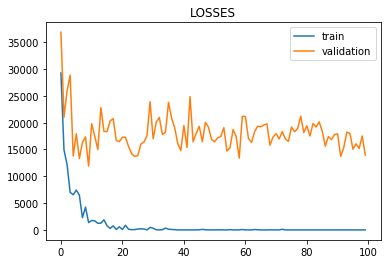

In [20]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [21]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4,data5,data6
accuracy,10.02,76.52,63.1,10.45,75.44,76.96
batch_size,128,128,128,128,128,128
bottleneck,True,True,True,True,True,False
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4,./tensorboard/cifar10_vgg16/exe_1/data5,./tensorboard/cifar10_vgg16/exe_1/data6
cm,NaN,NaN,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4,pool4,pool4
data_augmentation,True,True,True,True,False,True
decay_rate,0.98,0.98,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547,136.241,3913.53


---
## Fine tunning conclusion:

**data2:** `learning_rate:1e-3`, `fine_tunning:False` $\to$ `acc:76.52` , `elapsed_time:345.421`

**data7:** `learning_rate:1e-3`, `fine_tunning:True` $\to$ `acc:76.59`, `elapsed_time:3882.87` 

**Note:** `bottleneck:False` has not offered any increase in accuracy and took almost 12x more time that `fine_tunning:False`

---

Augmenting data...
Dropout was disabled.

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 64.77% - Batch_loss: 15957.4258 - (25.96, 3322.26) (steps,images)/sec
--> Validation accuracy: 67.70% (3385/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 69.32% - Batch_loss: 15970.4570 - (28.32, 3625.02) (steps,images)/sec
--> Validation accuracy: 70.28% (3514/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 79.55% - Batch_loss: 12097.1523 - (28.32, 3625.00) (steps,images)/sec
--> Validation accuracy: 71.82% (3591/5000)

*************************************************************
Epoch 4/100
--> Global step:  4219 - Last batch acc: 81.82% - Batch_loss: 5405.4683 - (28.25, 3615.53) (steps,images)/sec
--> Validation accuracy: 72.60% (3630/5000)

***************************************

--> Validation accuracy: 76.14% (3807/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 98.86% - Batch_loss: 198.8555 - (28.30, 3622.72) (steps,images)/sec
--> Validation accuracy: 76.44% (3822/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.24, 3614.85) (steps,images)/sec
--> Validation accuracy: 77.26% (3863/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 97.73% - Batch_loss: 141.5978 - (28.31, 3623.91) (steps,images)/sec
--> Validation accuracy: 76.86% (3843/5000)

*************************************************************
Epoch 40/100
--> Global step: 42199 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.28, 3620.45) (steps,images)/sec
--> Validation accuracy: 76.52% (3826/5000)

*****************************************

--> Validation accuracy: 77.48% (3874/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.33, 3625.81) (steps,images)/sec
--> Validation accuracy: 77.80% (3890/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.28, 3620.39) (steps,images)/sec
--> Validation accuracy: 77.38% (3869/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.24, 3614.27) (steps,images)/sec
--> Validation accuracy: 77.20% (3860/5000)

*************************************************************
Epoch 76/100
--> Global step: 80179 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (28.31, 3623.85) (steps,images)/sec
--> Validation accuracy: 77.28% (3864/5000)

*******************************************

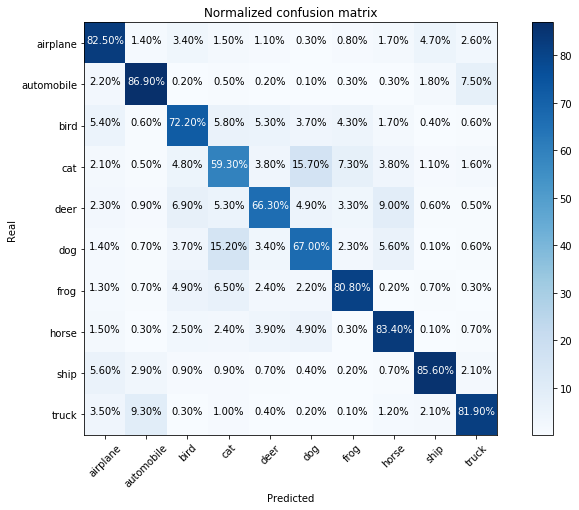

In [22]:
  name = 'data7'

  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = CUT_LAYER
  params.fine_tunning = True
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

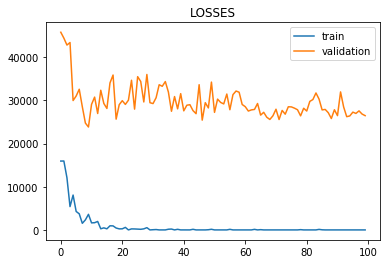

In [23]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [24]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4,data5,data6,data7
accuracy,10.02,76.52,63.1,10.45,75.44,76.96,76.59
batch_size,128,128,128,128,128,128,128
bottleneck,True,True,True,True,True,False,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4,./tensorboard/cifar10_vgg16/exe_1/data5,./tensorboard/cifar10_vgg16/exe_1/data6,./tensorboard/cifar10_vgg16/exe_1/data7
cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4,pool4,pool4,pool4
data_augmentation,True,True,True,True,False,True,True
decay_rate,0.98,0.98,0.98,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547,136.241,3913.53,3882.87


---
## Cutting_layer conclusions

**data2:** `learning_rate:1e-3`, **`cut_layer:'pool4'`** $\to$ `acc:76.52` , `elapsed_time:345.421`

**data8:** `learning_rate:1e-3`, **`cut_layer:'pool3'`** $\to$ `acc:79.62`, `elapsed_time:642.277` 

**data9:** `learning_rate:1e-3`, **`cut_layer:'pool5'`** $\to$ `acc:57.79`, `elapsed_time:233.218` 

**Note:** 
- **`cut_layer:'pool3'`** reached the best results, demanding about twice as much time as **`cut_layer:'pool4'`** to train.


- **`cut_layer:'pool5'`** did not produce satisfactory results.
---

Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool3_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 61.36% - Batch_loss: 142731.1250 - (113.57, 14537.31) (steps,images)/sec
--> Validation accuracy: 67.02% (3351/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 75.00% - Batch_loss: 67143.6719 - (197.44, 25272.80) (steps,images)/sec
--> Validation accuracy: 71.54% (3577/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 71.59% - Batch_loss: 62793.8125 - (191.35, 24492.64) (steps,images)/sec
--> Validation accuracy: 73.04% (3652/5000)

**************************

--> Global step: 36924 - Last batch acc: 98.86% - Batch_loss: 285.3402 - (191.28, 24484.10) (steps,images)/sec
--> Validation accuracy: 79.10% (3955/5000)

*************************************************************
Epoch 36/100
--> Global step: 37979 - Last batch acc: 98.86% - Batch_loss: 139.7117 - (198.97, 25468.58) (steps,images)/sec
--> Validation accuracy: 79.84% (3992/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 97.73% - Batch_loss: 197.1257 - (190.81, 24423.09) (steps,images)/sec
--> Validation accuracy: 79.84% (3992/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (197.46, 25274.78) (steps,images)/sec
--> Validation accuracy: 79.78% (3989/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (195.

--> Global step: 74904 - Last batch acc: 98.86% - Batch_loss: 491.3722 - (190.75, 24415.55) (steps,images)/sec
--> Validation accuracy: 80.16% (4008/5000)

*************************************************************
Epoch 72/100
--> Global step: 75959 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (192.16, 24596.97) (steps,images)/sec
--> Validation accuracy: 80.40% (4020/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (192.56, 24647.54) (steps,images)/sec
--> Validation accuracy: 80.24% (4012/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (193.06, 24711.54) (steps,images)/sec
--> Validation accuracy: 80.38% (4019/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 100.00% - Batch_loss: 0.0000 - (194.64

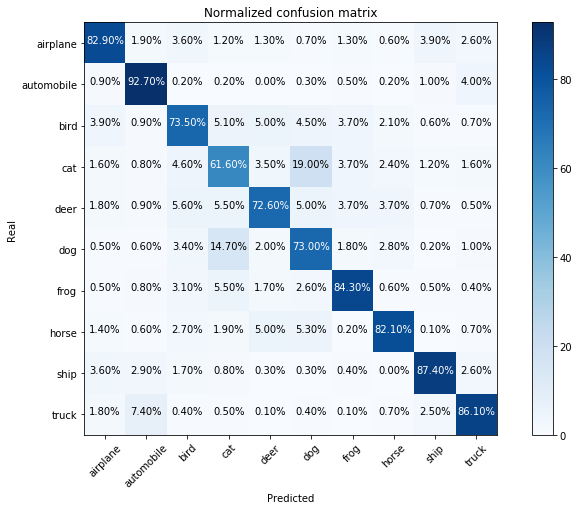

In [25]:
  name = 'data8'
  
  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = 'pool3'
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

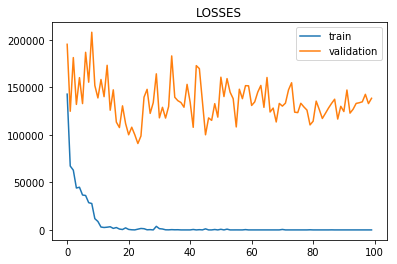

In [26]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [27]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4,data5,data6,data7,data8
accuracy,10.02,76.52,63.1,10.45,75.44,76.96,76.59,79.62
batch_size,128,128,128,128,128,128,128,128
bottleneck,True,True,True,True,True,False,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4,./tensorboard/cifar10_vgg16/exe_1/data5,./tensorboard/cifar10_vgg16/exe_1/data6,./tensorboard/cifar10_vgg16/exe_1/data7,./tensorboard/cifar10_vgg16/exe_1/data8
cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4,pool4,pool4,pool4,pool3
data_augmentation,True,True,True,True,False,True,True,True
decay_rate,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547,136.241,3913.53,3882.87,642.277


Augmenting data...
Stopping gradient
Dropout was disabled.
Loading bottleneck from "./data_set/bottleneck_vgg16_pool5_train.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool5_test.pkl" 
Loading bottleneck from "./data_set/bottleneck_vgg16_pool5_validation.pkl" 

*************************************************************
Epoch 1/100
--> Global step:  1054 - Last batch acc: 52.27% - Batch_loss: 603.4856 - (126.64, 16210.27) (steps,images)/sec
--> Validation accuracy: 52.68% (2634/5000)

*************************************************************
Epoch 2/100
--> Global step:  2109 - Last batch acc: 57.95% - Batch_loss: 671.3452 - (629.92, 80629.38) (steps,images)/sec
--> Validation accuracy: 54.06% (2703/5000)

*************************************************************
Epoch 3/100
--> Global step:  3164 - Last batch acc: 57.95% - Batch_loss: 472.3042 - (630.26, 80673.78) (steps,images)/sec
--> Validation accuracy: 55.76% (2788/5000)

*********************************

--> Global step: 37979 - Last batch acc: 82.95% - Batch_loss: 18.4783 - (628.98, 80509.90) (steps,images)/sec
--> Validation accuracy: 57.22% (2861/5000)

*************************************************************
Epoch 37/100
--> Global step: 39034 - Last batch acc: 88.64% - Batch_loss: 9.9267 - (629.54, 80580.79) (steps,images)/sec
--> Validation accuracy: 57.52% (2876/5000)

*************************************************************
Epoch 38/100
--> Global step: 40089 - Last batch acc: 88.64% - Batch_loss: 18.2517 - (629.89, 80625.48) (steps,images)/sec
--> Validation accuracy: 57.34% (2867/5000)

*************************************************************
Epoch 39/100
--> Global step: 41144 - Last batch acc: 90.91% - Batch_loss: 10.8641 - (632.44, 80952.57) (steps,images)/sec
--> Validation accuracy: 58.04% (2902/5000)

*************************************************************
Epoch 40/100
--> Global step: 42199 - Last batch acc: 88.64% - Batch_loss: 15.3523 - (632.31, 

--> Global step: 75959 - Last batch acc: 97.73% - Batch_loss: 1.1366 - (632.17, 80917.57) (steps,images)/sec
--> Validation accuracy: 58.46% (2923/5000)

*************************************************************
Epoch 73/100
--> Global step: 77014 - Last batch acc: 97.73% - Batch_loss: 0.3700 - (631.80, 80870.58) (steps,images)/sec
--> Validation accuracy: 58.00% (2900/5000)

*************************************************************
Epoch 74/100
--> Global step: 78069 - Last batch acc: 95.45% - Batch_loss: 1.6215 - (632.80, 80998.56) (steps,images)/sec
--> Validation accuracy: 58.18% (2909/5000)

*************************************************************
Epoch 75/100
--> Global step: 79124 - Last batch acc: 98.86% - Batch_loss: 0.3406 - (631.26, 80801.40) (steps,images)/sec
--> Validation accuracy: 58.34% (2917/5000)

*************************************************************
Epoch 76/100
--> Global step: 80179 - Last batch acc: 98.86% - Batch_loss: 0.8566 - (630.38, 8068

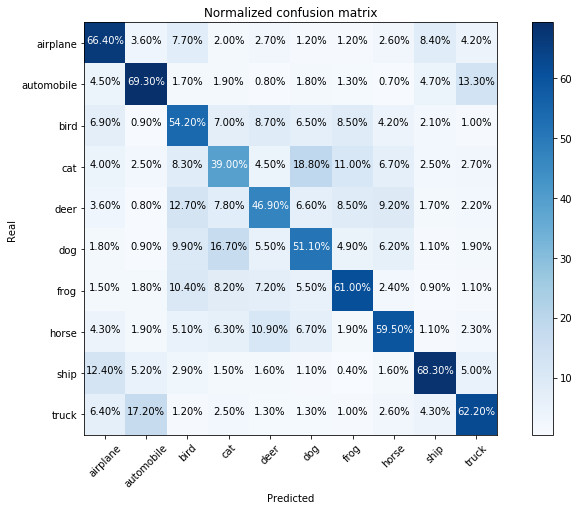

In [28]:
  name = 'data9'
  
  params = Hyperparameters()
  params.num_epochs = 100
  params.hidden_layers = [1024]
  params.initial_learning_rate = 1e-3
  params.cut_layer = 'pool5'
  params.check_points_path = CPP+name
  
  time_init = time.time()
  metrics = train(params, extrc)   
  time_conc = time.time() - time_init

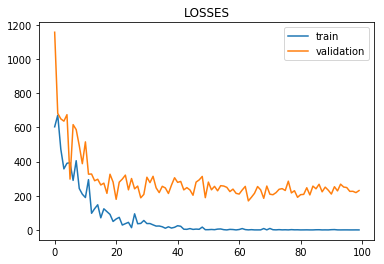

In [29]:
  plt.plot(range(len(metrics['loss[train]'])), metrics['loss[train]'], label='train')
  plt.plot(range(len(metrics['loss[validation]'])), metrics['loss[validation]'], label='validation')
  plt.title('LOSSES')
  plt.legend()
  plt.savefig(LOGDIR+'losses_'+name+'.png')
  plt.show()

In [30]:
  save_params(name, params, metrics, elapsed_time=time_conc, df=df, path=LOGDIR+JSON_FILE)

,data1,data2,data3,data4,data5,data6,data7,data8,data9
accuracy,10.02,76.52,63.1,10.45,75.44,76.96,76.59,79.62,57.79
batch_size,128,128,128,128,128,128,128,128,128
bottleneck,True,True,True,True,True,False,True,True,True
check_points_path,./tensorboard/cifar10_vgg16/exe_1/data1,./tensorboard/cifar10_vgg16/exe_1/data2,./tensorboard/cifar10_vgg16/exe_1/data3,./tensorboard/cifar10_vgg16/exe_1/data4,./tensorboard/cifar10_vgg16/exe_1/data5,./tensorboard/cifar10_vgg16/exe_1/data6,./tensorboard/cifar10_vgg16/exe_1/data7,./tensorboard/cifar10_vgg16/exe_1/data8,./tensorboard/cifar10_vgg16/exe_1/data9
cm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut_layer,pool4,pool4,pool4,pool4,pool4,pool4,pool4,pool3,pool5
data_augmentation,True,True,True,True,False,True,True,True,True
decay_rate,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
decay_steps,1000,1000,1000,1000,1000,1000,1000,1000,1000
elapsed_time,352.145,345.421,360.319,360.547,136.241,3913.53,3882.87,642.277,233.218


---
## Accuracy x Elapsed time

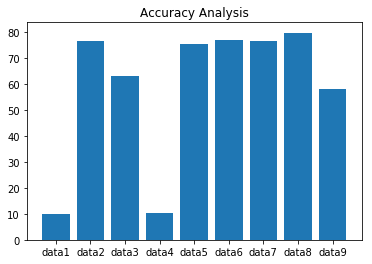

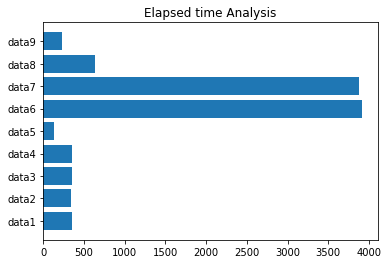

In [31]:
  metrics = ['elapsed_time', 'accuracy']
  ac = df.loc[metrics]

  x = ac.loc[metrics[0]].values
  y = ac.loc[metrics[1]].values
  labels = list(ac.columns)
  pos = range(1, y.size+1)

  plt.bar(pos, y)
  plt.title('Accuracy Analysis')
  plt.xticks(pos, labels)
  plt.savefig(LOGDIR+'accuracy_analysis.png')
  plt.show()

  plt.barh(pos, x)
  plt.title('Elapsed time Analysis')
  plt.yticks(pos, labels)
  plt.savefig(LOGDIR+'elapsed_time_Analysis.png')
  plt.show()